In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

In [2]:
country_dict = dict()
with open('clusters_users.txt') as f:
    for l in f:
        parts = l.split(':')
        cluster = parts[0]
        countries = parts[1].strip().split(' ')
        for c in countries:
            country_dict[c] = cluster

In [3]:
df_users = pd.read_csv('LFM-1b_users.txt', sep='\t')

In [4]:
df_users.head()

,user_id,country,age,gender,playcount,registered_unixtime
0,384,UK,35,m,42139,1035849600
1,1206,NaN,-1,n,33103,1035849600
2,2622,NaN,-1,NaN,2030,1037404800
3,2732,NaN,-1,n,147,1037577600
4,3653,UK,31,m,18504,1041033600


In [5]:
df_users = df_users[['user_id', 'country', 'age', 'gender', 'playcount']]
df_users = df_users.dropna()

In [6]:
df_users.head()

,user_id,country,age,gender,playcount
0,384,UK,35,m,42139
4,3653,UK,31,m,18504
5,4813,US,43,m,640
7,5069,AT,30,m,31867
8,5213,UK,37,n,392


In [7]:
clusters_dict = dict()
for u, s in df_users.iterrows():
    if s['country'] in country_dict:
        clusters_dict[u] = country_dict[s['country']]
    else:
        clusters_dict[u] = np.nan
s_clusters = pd.Series(clusters_dict)

In [8]:
df_users['cluster'] = s_clusters

In [9]:
df_users.head()

,user_id,country,age,gender,playcount,cluster
0,384,UK,35,m,42139,Cluster 2
4,3653,UK,31,m,18504,Cluster 2
5,4813,US,43,m,640,Cluster 3
7,5069,AT,30,m,31867,Cluster 1
8,5213,UK,37,n,392,Cluster 2


In [10]:
df_users = df_users.where((df_users['age'] > 3) & (df_users['age'] < 100))
df_users = df_users.where((df_users['gender'] == 'm') | (df_users['gender'] == 'f'))
df_users = df_users.dropna()
len(df_users)

39971

In [12]:
clusters = []
age_clusters = []
pc_clusters = []
female_ratios = []
for u, df in df_users.groupby('cluster'):
    clusters.append(u.replace(' ', ''))
    age_clusters.append(df['age'])
    pc_clusters.append(df['playcount'])
    f = df['gender'].value_counts()['f']
    female_ratios.append(f / (len(df)))

<IPython.core.display.Javascript object>


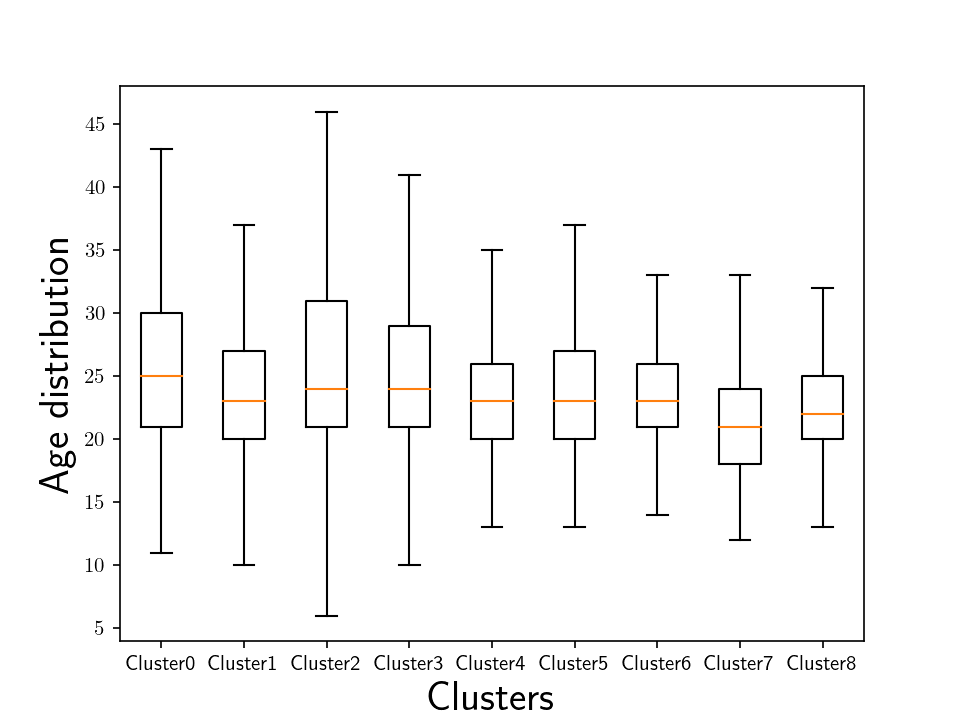

C:\Users\dkowald\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [13]:
data = age_clusters[1:]
labels = clusters[1:]

plt.figure()
plt.boxplot(data, labels=labels, showfliers=False)
ax = plt.subplot(111)
#plt.setp(ax.get_xticklabels(), fontsize = 16.0)
#plt.setp(ax.get_yticklabels(), fontsize = 16.0)
ax.set_xlabel('Clusters', fontsize = 20.0)
ax.set_ylabel('Age distribution', fontsize = 20.0)
plt.savefig('age_clusters.pdf', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


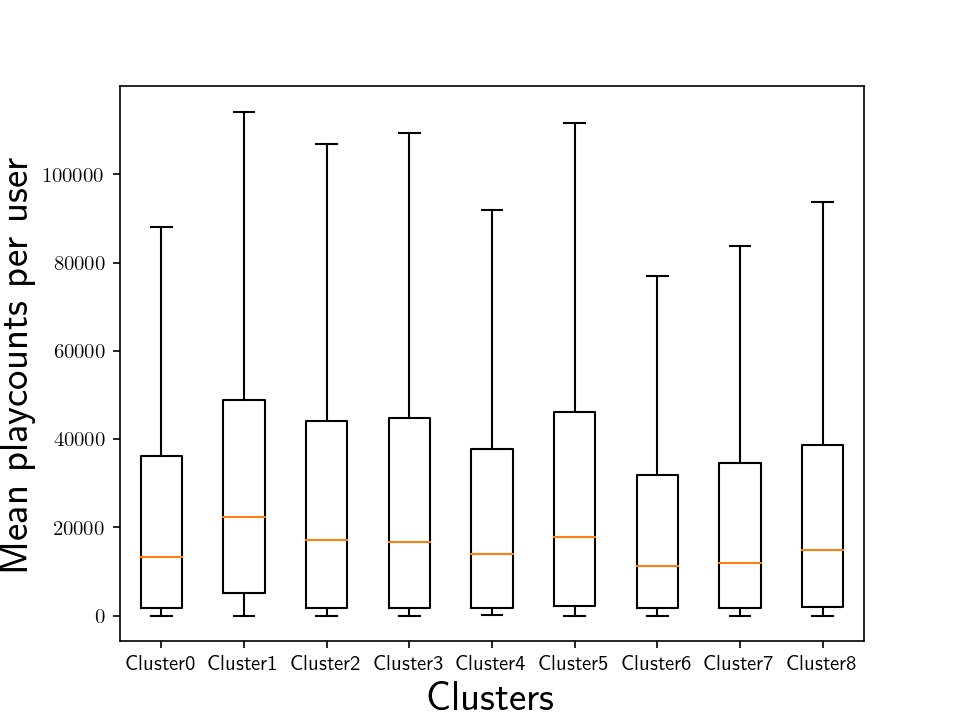

C:\Users\dkowald\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [14]:
data = pc_clusters[1:]
labels = clusters[1:]

plt.figure()
plt.boxplot(data, labels=labels, showfliers=False)
ax = plt.subplot(111)
#plt.setp(ax.get_xticklabels(), fontsize = 16.0)
#plt.setp(ax.get_yticklabels(), fontsize = 16.0)
ax.set_xlabel('Clusters', fontsize = 20.0)
ax.set_ylabel('Mean playcounts per user', fontsize = 20.0)
plt.savefig('pc_clusters.pdf', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


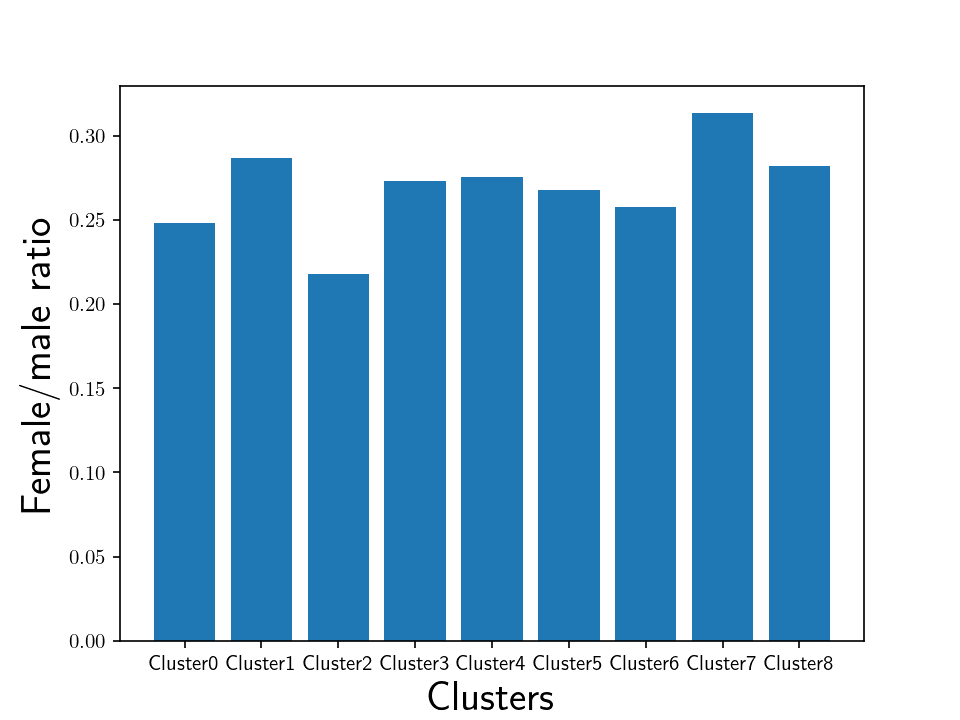

C:\Users\dkowald\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


In [15]:
data = female_ratios[1:]
labels = clusters[1:]

plt.figure()
plt.bar(np.arange(len(data)), data)
plt.xticks(np.arange(len(labels)), labels)
ax = plt.subplot(111)
#plt.setp(ax.get_xticklabels(), fontsize = 16.0)
#plt.setp(ax.get_yticklabels(), fontsize = 16.0)
ax.set_xlabel('Clusters', fontsize = 20.0)
ax.set_ylabel('Female/male ratio', fontsize = 20.0)
plt.savefig('female_ratio.pdf', dpi=300, bbox_inches='tight')

In [15]:
countries = []
age_countries = []
female_ratios = []
for u, df in df_users.groupby('country'):
    countries.append(u.replace(' ', ''))
    age_countries.append(df['age'])
    f = df['gender'].value_counts()['f']
    female_ratios.append(f / (len(df)))

<IPython.core.display.Javascript object>


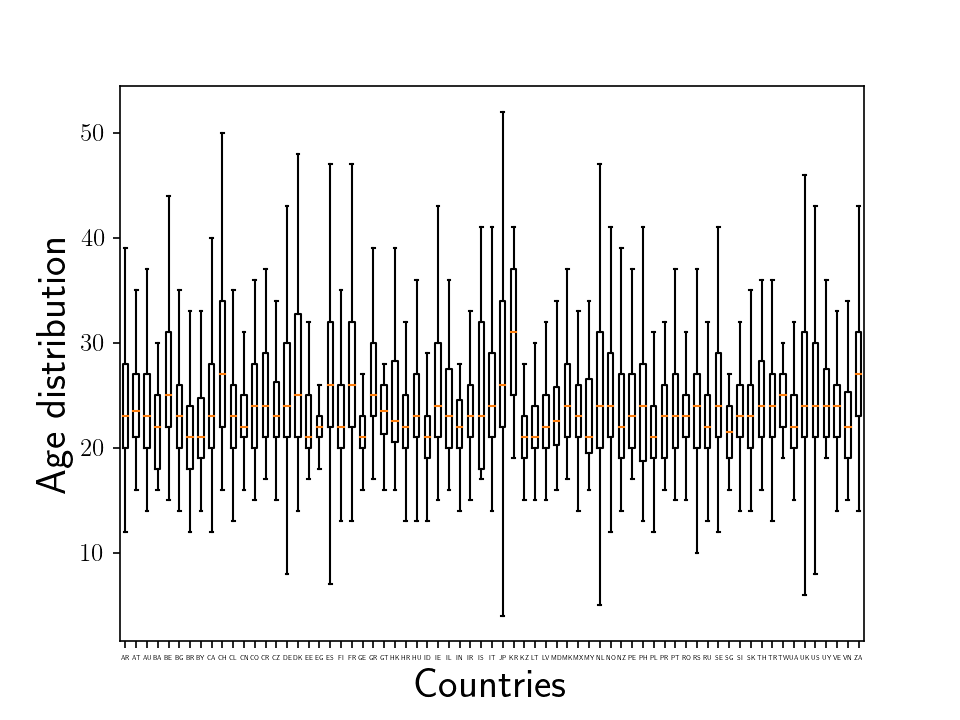

C:\Users\dkowald\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [22]:
data = age_countries[1:]
labels = countries[1:]

plt.figure()
plt.boxplot(data, labels=labels, showfliers=False)
ax = plt.subplot(111)
plt.setp(ax.get_xticklabels(), fontsize = 3.0)
plt.setp(ax.get_yticklabels(), fontsize = 12.0)
ax.set_xlabel('Countries', fontsize = 20.0)
ax.set_ylabel('Age distribution', fontsize = 20.0)
plt.savefig('age_countries.pdf', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


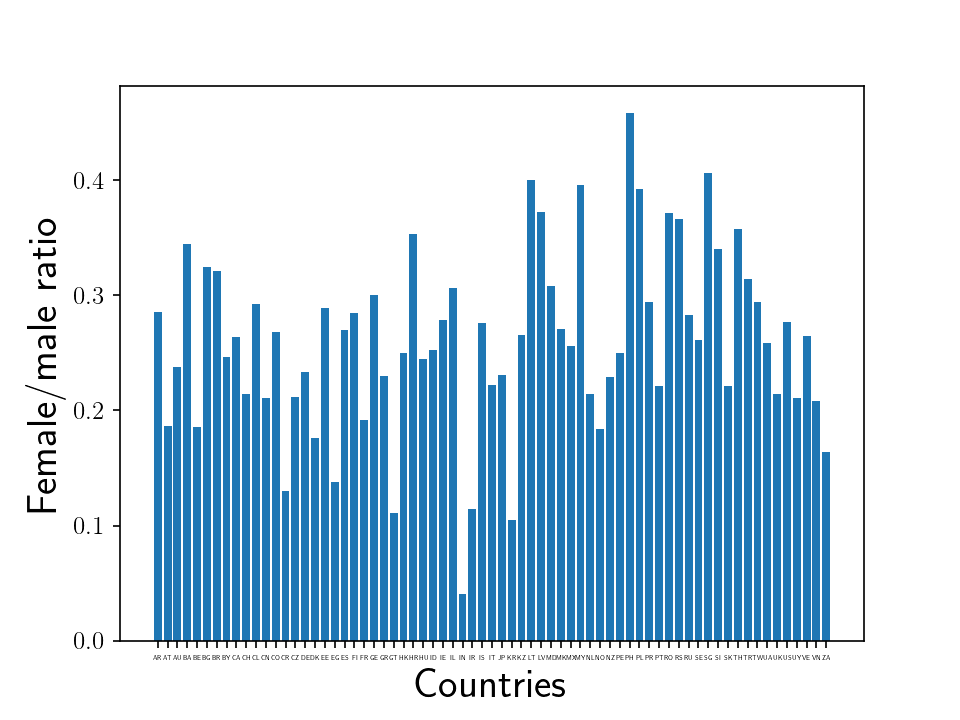

C:\Users\dkowald\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


In [21]:
data = female_ratios[1:]
labels = countries[1:]

plt.figure()
plt.bar(np.arange(len(data)), data)
plt.xticks(np.arange(len(labels)), labels)
ax = plt.subplot(111)
plt.setp(ax.get_xticklabels(), fontsize = 3.0)
plt.setp(ax.get_yticklabels(), fontsize = 12.0)
ax.set_xlabel('Countries', fontsize = 20.0)
ax.set_ylabel('Female/male ratio', fontsize = 20.0)
plt.savefig('female_ratio_countries.pdf', dpi=300, bbox_inches='tight')